# Probability of market going up next day

### Wouldn't it be nice if we could predict with some degree of probability whether the stock market is going to go up tomorrow?

In [1]:
### Business question and domain knowledge_ Explicamos
### Se trata de poder predecir la probabilidad que tenemos de que al día siguiente el mercado (índice S&P500) suba teniendo en cuenta los ciertos datos obtenidos hoy (features)

## 2. Dataset

### 2.1. Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings

warnings.filterwarnings('ignore')

### 2.2 Import Dataset

In [3]:
df = pd.read_excel("Midproject_dataset_pre_alt.xlsx")
pd.set_option('display.max_columns', None)
df.head()

,DATE,ES,AVG(5)[1],AVG(200)[1],RSI(2)[1],VIX[1],EUR-USD[1],10YR_IR[1],CRUDE OIL[1],NG[1],GOLD[1],Change AVG(5),C - AVG(200),RSI(2),VIX,Change VIX,Change EUR-USD,Change 10YR_IR,Change CRUDE OIL,Change NG,Change GOLD,S&P500 RET,RET_LABEL
0,2004-10-13,1112.00,1129.00,1119.98500,25.759886,15.05,1.2324,112.828,52.51,6.636,416.6,-0.004146,1,14.202489,15.05,0.000000,-0.006530,-0.002221,-0.015007,-0.073573,-0.018610,-0.009133,0
1,2004-10-14,1103.00,1122.80,1119.93625,8.580459,15.42,1.2342,113.094,53.64,6.851,414.6,-0.005492,0,25.759886,15.05,0.024585,0.001461,-0.002358,0.021520,0.032399,-0.004801,-0.008094,1
2,2004-10-15,1108.75,1117.05,1119.82375,3.952030,16.43,1.2384,113.531,54.76,6.803,419.5,-0.005121,0,8.580459,15.42,0.065499,0.003403,-0.003864,0.020880,-0.007006,0.011819,0.005213,1
3,2004-10-18,1112.75,1114.40,1119.71875,43.141736,15.04,1.2470,113.219,54.93,6.709,420.1,-0.002372,0,3.952030,16.43,-0.084601,0.006944,0.002748,0.003104,-0.013817,0.001430,0.003608,0
4,2004-10-19,1103.50,1111.75,1119.68125,63.731022,14.71,1.2493,113.234,53.67,6.806,417.6,-0.002378,0,43.141736,15.04,-0.021941,0.001844,-0.000132,-0.022938,0.014458,-0.005951,-0.008313,0


### 2.3. First look at the main features

In [4]:
# Viewing dimensions of dataset.
df.shape

(3727, 23)

In [5]:
# Viewing the summary of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727 entries, 0 to 3726
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              3727 non-null   datetime64[ns]
 1   ES                3727 non-null   float64       
 2   AVG(5)[1]         3727 non-null   float64       
 3   AVG(200)[1]       3727 non-null   float64       
 4   RSI(2)[1]         3727 non-null   float64       
 5   VIX[1]            3727 non-null   float64       
 6   EUR-USD[1]        3727 non-null   float64       
 7   10YR_IR[1]        3727 non-null   float64       
 8   CRUDE OIL[1]      3727 non-null   float64       
 9   NG[1]             3727 non-null   float64       
 10  GOLD[1]           3727 non-null   float64       
 11  Change AVG(5)     3727 non-null   float64       
 12  C - AVG(200)      3727 non-null   int64         
 13  RSI(2)            3727 non-null   float64       
 14  VIX               3727 n

In [6]:
# Checking the % of NaN values by column.
round((df.isna().sum()/len(df)*100),2)

DATE                0.00
ES                  0.00
AVG(5)[1]           0.00
AVG(200)[1]         0.00
RSI(2)[1]           0.00
VIX[1]              0.00
EUR-USD[1]          0.00
10YR_IR[1]          0.00
CRUDE OIL[1]        0.00
NG[1]               0.00
GOLD[1]             0.00
Change AVG(5)       0.00
C - AVG(200)        0.00
RSI(2)              0.00
VIX                 0.00
Change VIX          0.00
Change EUR-USD      0.00
Change 10YR_IR      0.00
Change CRUDE OIL    0.21
Change NG           0.00
Change GOLD         0.00
S&P500 RET          0.00
RET_LABEL           0.00
dtype: float64

In [7]:
df.columns

Index(['DATE', 'ES', 'AVG(5)[1]', 'AVG(200)[1]', 'RSI(2)[1]', 'VIX[1]',
       'EUR-USD[1]', '10YR_IR[1]', 'CRUDE OIL[1]', 'NG[1]', 'GOLD[1]',
       'Change AVG(5)', 'C - AVG(200)', 'RSI(2)', 'VIX', 'Change VIX',
       'Change EUR-USD', 'Change 10YR_IR', 'Change CRUDE OIL', 'Change NG',
       'Change GOLD', 'S&P500 RET', 'RET_LABEL'],
      dtype='object')

### 2.4. Rename the columns so they follow the PE8 (snake case).

In [8]:
# Rename the columns so they follow the PE8 (snake case)
df.columns = df.columns.str.lower().str.replace(" ","_")
df.head()

,date,es,avg(5)[1],avg(200)[1],rsi(2)[1],vix[1],eur-usd[1],10yr_ir[1],crude_oil[1],ng[1],gold[1],change_avg(5),c_-_avg(200),rsi(2),vix,change_vix,change_eur-usd,change_10yr_ir,change_crude_oil,change_ng,change_gold,s&p500_ret,ret_label
0,2004-10-13,1112.00,1129.00,1119.98500,25.759886,15.05,1.2324,112.828,52.51,6.636,416.6,-0.004146,1,14.202489,15.05,0.000000,-0.006530,-0.002221,-0.015007,-0.073573,-0.018610,-0.009133,0
1,2004-10-14,1103.00,1122.80,1119.93625,8.580459,15.42,1.2342,113.094,53.64,6.851,414.6,-0.005492,0,25.759886,15.05,0.024585,0.001461,-0.002358,0.021520,0.032399,-0.004801,-0.008094,1
2,2004-10-15,1108.75,1117.05,1119.82375,3.952030,16.43,1.2384,113.531,54.76,6.803,419.5,-0.005121,0,8.580459,15.42,0.065499,0.003403,-0.003864,0.020880,-0.007006,0.011819,0.005213,1
3,2004-10-18,1112.75,1114.40,1119.71875,43.141736,15.04,1.2470,113.219,54.93,6.709,420.1,-0.002372,0,3.952030,16.43,-0.084601,0.006944,0.002748,0.003104,-0.013817,0.001430,0.003608,0
4,2004-10-19,1103.50,1111.75,1119.68125,63.731022,14.71,1.2493,113.234,53.67,6.806,417.6,-0.002378,0,43.141736,15.04,-0.021941,0.001844,-0.000132,-0.022938,0.014458,-0.005951,-0.008313,0


In [9]:
### Data cleaning is already performed through Excel---
### Try to do de data cleaning through Python in case we have got spare time in the end

### Data cleaning steps
### Data was retrieved from esignal service (all but gold) and from https://www.kaggle.com/datasets/psycon/daily-gold-price-historical-data  for gold prices
### Step 1: Each symbol consist of a pair columns (Date,Close). We retrieve all information for each symbol separately\n",
### Step 2: Each symbol different dates (they belong to different Exchanges and trading activity and trading hours/holidays might be different)
### Step 3: Date format need to be changed from (DTYYYYMMDD) to ((MM/DD/YYYY). Date is not important for the project but it is to align the different symbols sets
### Step 4: Technical Indicators on the underlying (AVG(5),AVG(200) & RSI) must be calculated from underlying data (S&P500)
### Step 5: All symbols must be joined/grouped in a single DataFrame accoriding to Date\n",
### Step 6: Transform Data: We are not interested on actual values of S&P500 but on whether it ahs gone up or down. We get return and then a categorical value for it
###  Up: 1 ; Down: 0\n",
### Step 7: Features need to be transformed: We are typically more interested in knowing how other markets have changed (their daily return) than in actual quotes
###        Sometimes there is important information on actual values (i.e VIX or RSI). I case of AVG(200) we just want to know if we are in a long term upside regime (1 or not 0)
### Step 8: VERY, VERY IMPORTANT!!!! 
    ##        Features must belong to prior date. We want to predict if TOMORROW the market is going to go up with TODAY´s information. So we need to make sure that all features information
    ##        has 1 day-lag (For each date , we have S&P500 return (up or down) for the day and features values must belong to yesterdays activity)

## 3. EDA

### 3.1 Stylized Facts

#### Stylized facts is like a specific EDA for asset returns time series. Asset returns typically show some statistical properties that do not appear in other areas
#### It is important to know them in order to build models

<br>

#### 0.-   S&P500 Returns
***

[Text(0.5, 1.0, 'S&P500 RETURNS'), Text(0, 0.5, 'Ret')]

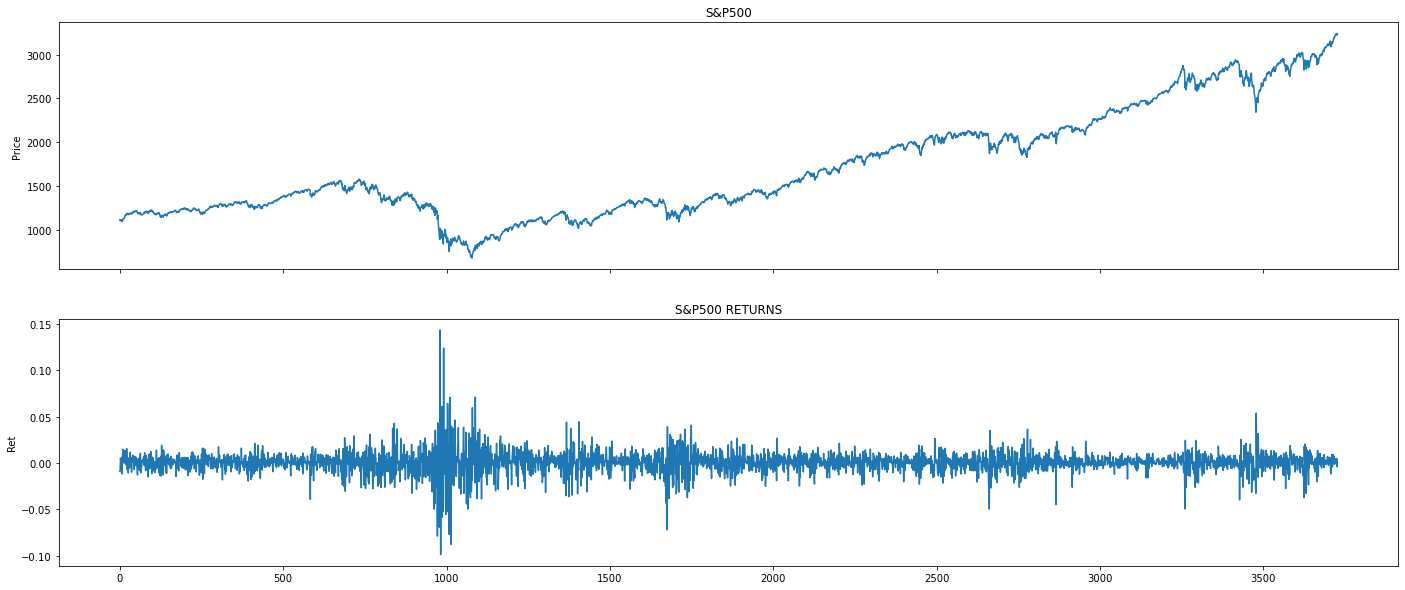

In [10]:
# Lets plot the S&P500 and its returns

fig,ax = plt.subplots(2,1,figsize=(24,10),sharex=True)
df.es.plot(ax=ax[0])
ax[0].set(title='S&P500',ylabel = "Price")

df["s&p500_ret"].plot(ax=ax[1])
ax[1].set(title='S&P500 RETURNS',ylabel = "Ret")


<br>

#### 1.- Gaussian Returns?
***

In [11]:
ret = df['s&p500_ret']
rng =  np.linspace(min(ret),max(ret),num=1000)
mu = ret.mean()
sigma = ret.std()
norm_pdf = stats.norm.pdf(rng,loc=mu,scale=sigma)

In [12]:
# We plot the histogram & QQplot

Text(0.5, 1.0, 'Q-Q plot')

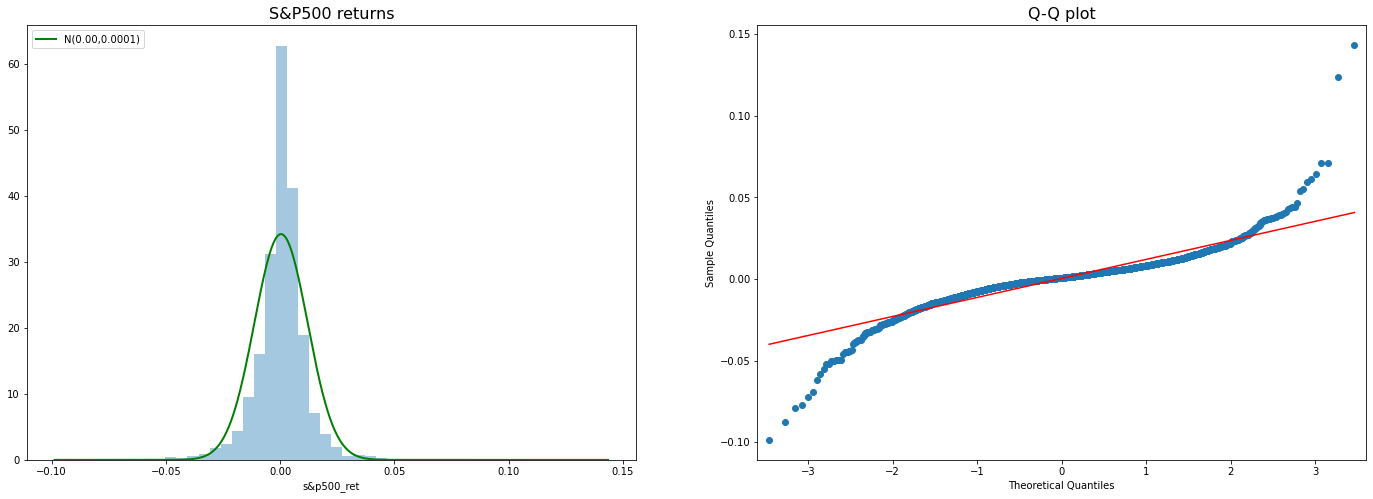

In [13]:
fig,ax = plt.subplots(1,2,figsize=(24,8))

# Histogram (subplot1):
sns.distplot(ret, kde=False,norm_hist=True,ax=ax[0])
ax[0].set_title("S&P500 returns",fontsize=16)
ax[0].plot(rng,norm_pdf,"g",lw=2,label=f'N({mu:.2f},{sigma**2:.4f})')
ax[0].legend(loc="upper left")

## Q-Q plot 
qq = sm.qqplot(ret.values,line='s',ax=ax[1])
ax[1].set_title('Q-Q plot',fontsize=16)

In [14]:
# Q-Qplot is clear, returns are not normally distributed. Fat tails

In [15]:
# Some analysis 
ret.describe()

count    3727.000000
mean        0.000352
std         0.011659
min        -0.098728
25%        -0.003950
50%         0.000702
75%         0.005460
max         0.143460
Name: s&p500_ret, dtype: float64

In [16]:
#Skewness and kurtosis of S&P500 returns. Jarque Bera test confirms returns do not follow a Normal distribution
print("Skewness:",ret.skew())
print("Kurtosis:",ret.kurtosis())
print(stats.jarque_bera(ret))

Skewness: 0.14185374989907534
Kurtosis: 16.7738402575522
Jarque_beraResult(statistic=43580.134860112856, pvalue=0.0)


In [17]:
# Accortding to mean, std, Skewness and kurtosis we can infere distribution is not normal. 
# Specifically we can see kurtosis as the main feature of this distribution : Fat tails
# Besides Jarque Bera normality test would make us reject distribution is normal at 99% level

# Therefore we can reject null hypothesis at the 99% confidence level since pvalue is 0.0 (<0.05). Returns on S&P500 are not normally distributed

<br>

#### Volatility clustering
***

<AxesSubplot:title={'center':'S&P 500 returns'}>

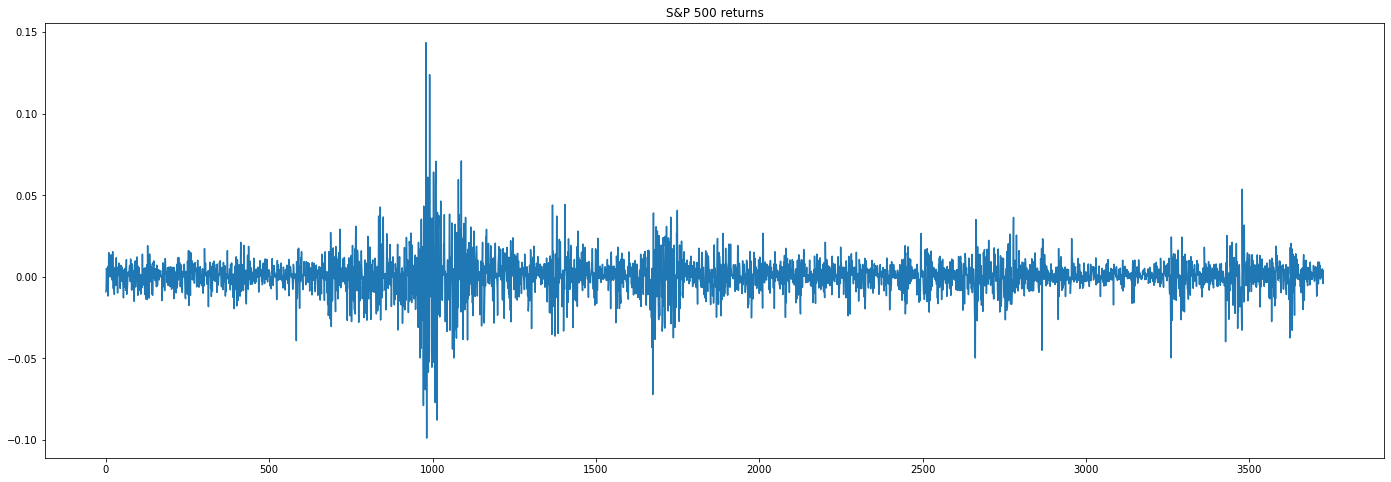

In [18]:
fig,ax = plt.subplots(1,1,figsize=(24,8))
ret.plot(title="S&P 500 returns")

In [19]:
# Volatility seems to cluster (periods of high/low volatility in market returns tend to persist)....Conditional Heteroskedaticity

<br>

#### Autocorrelation in returns
***

In [20]:
# We now take a look to autocorrelation (How similar is a given time series to the lagged version of itself)
# Previous plot shows that returns tend to jump around zero and we see no persistent trends, this means little autocorrelation
# This are not good news for predicting future outcomes, there would be no way to make money if price follows a random walk
# Lets check this more visually through autocorrelation function (ACF)

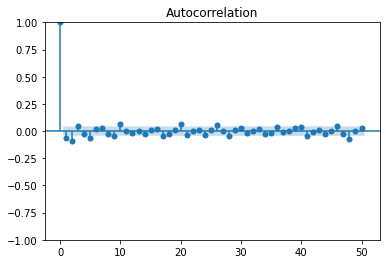

In [21]:
N_LAGS = 50
SIGNIFCANCE_LEVEL=0.01
acf = smt.graphics.plot_acf(ret,lags = N_LAGS,alpha=SIGNIFCANCE_LEVEL)

In [22]:
# Most of the values lie between the confidence interval. We can asume that there is no autocorrelation in the returns

<br>

#### Leverage effect
***

In [23]:
# Volatility measures as rolling standard deviations
df['moving_avg_std_252'] = df[["s&p500_ret"]].rolling(window=252).std()
df['moving_avg_std_21'] = df[["s&p500_ret"]].rolling(window=21).std()

<AxesSubplot:>

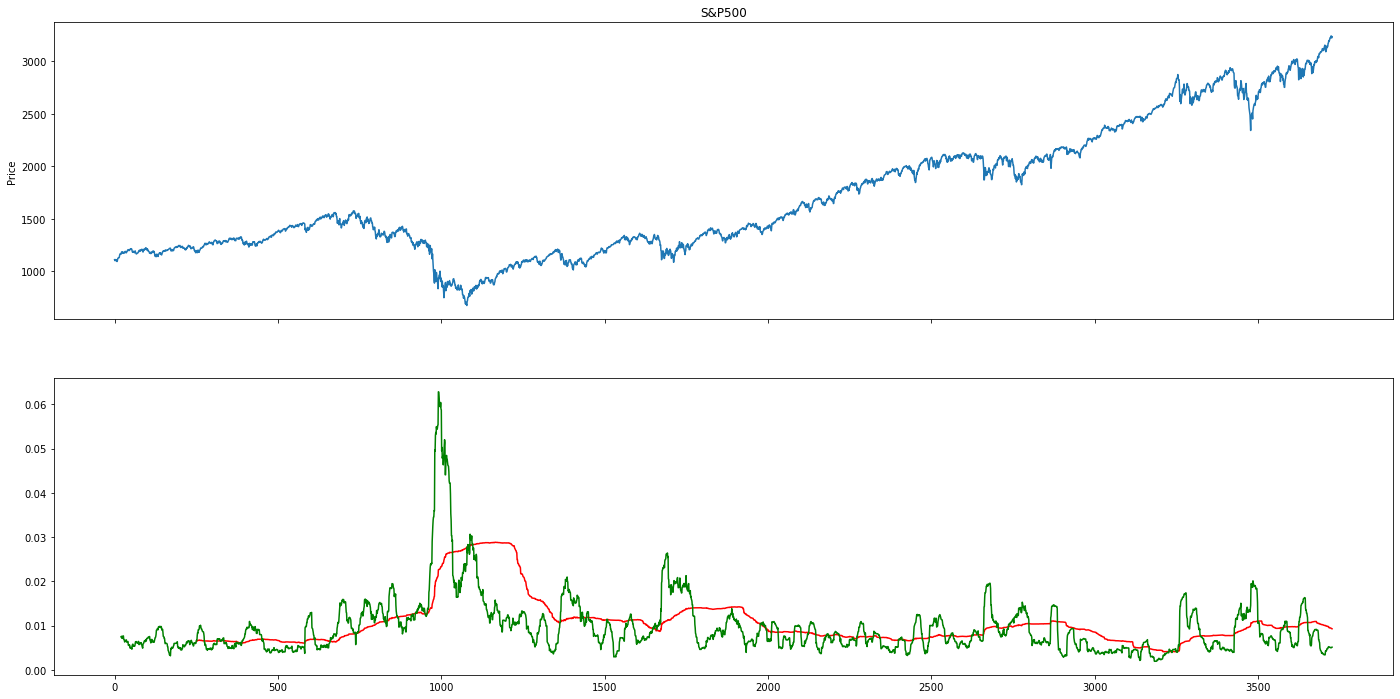

In [24]:
# Series

fig,ax = plt.subplots(2,1,figsize=(24,12),sharex=True)

df.es.plot(ax=ax[0])
ax[0].set(title='S&P500',ylabel = "Price")

df['moving_avg_std_252'].plot(ax=ax[1],color='r',label = 'Moving Volatility 252d')
df['moving_avg_std_21'].plot(ax=ax[1],color='g',label = 'Moving Volatility 21d')


In [25]:
# We see an important feature of financial time series: asset volatility is negatively correlated with returns.In this case we´re taking a look at realized volatility
# Asset returns volatility is typically considered as the "fear index", volatility increases when market drops, so it is typically negatively correlated to market returns

### 3.1 EDA other variables

In [26]:
col_start = df.iloc[:, 0:2]
col_end = df.iloc[:, 11:23]
new_df = pd.concat([col_start, col_end], axis=1)
new_df.head()

,date,es,change_avg(5),c_-_avg(200),rsi(2),vix,change_vix,change_eur-usd,change_10yr_ir,change_crude_oil,change_ng,change_gold,s&p500_ret,ret_label
0,2004-10-13,1112.00,-0.004146,1,14.202489,15.05,0.000000,-0.006530,-0.002221,-0.015007,-0.073573,-0.018610,-0.009133,0
1,2004-10-14,1103.00,-0.005492,0,25.759886,15.05,0.024585,0.001461,-0.002358,0.021520,0.032399,-0.004801,-0.008094,1
2,2004-10-15,1108.75,-0.005121,0,8.580459,15.42,0.065499,0.003403,-0.003864,0.020880,-0.007006,0.011819,0.005213,1
3,2004-10-18,1112.75,-0.002372,0,3.952030,16.43,-0.084601,0.006944,0.002748,0.003104,-0.013817,0.001430,0.003608,0
4,2004-10-19,1103.50,-0.002378,0,43.141736,15.04,-0.021941,0.001844,-0.000132,-0.022938,0.014458,-0.005951,-0.008313,0


In [27]:
new_df.shape

(3727, 14)

In [28]:
new_df.dtypes

date                datetime64[ns]
es                         float64
change_avg(5)              float64
c_-_avg(200)                 int64
rsi(2)                     float64
vix                        float64
change_vix                 float64
change_eur-usd             float64
change_10yr_ir             float64
change_crude_oil           float64
change_ng                  float64
change_gold                float64
s&p500_ret                 float64
ret_label                    int64
dtype: object

In [29]:
df_continuous = new_df.select_dtypes(include=['float64'])
df_continuous.head()

,es,change_avg(5),rsi(2),vix,change_vix,change_eur-usd,change_10yr_ir,change_crude_oil,change_ng,change_gold,s&p500_ret
0,1112.00,-0.004146,14.202489,15.05,0.000000,-0.006530,-0.002221,-0.015007,-0.073573,-0.018610,-0.009133
1,1103.00,-0.005492,25.759886,15.05,0.024585,0.001461,-0.002358,0.021520,0.032399,-0.004801,-0.008094
2,1108.75,-0.005121,8.580459,15.42,0.065499,0.003403,-0.003864,0.020880,-0.007006,0.011819,0.005213
3,1112.75,-0.002372,3.952030,16.43,-0.084601,0.006944,0.002748,0.003104,-0.013817,0.001430,0.003608
4,1103.50,-0.002378,43.141736,15.04,-0.021941,0.001844,-0.000132,-0.022938,0.014458,-0.005951,-0.008313


In [30]:
df_discrete = new_df.select_dtypes(include=['int64'])
df_discrete.head()

,c_-_avg(200),ret_label
0,1,0
1,0,1
2,0,1
3,0,0
4,0,0


#### 3.1.1 Descriptive statistics for each feature

In [31]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
es,3727.0,1709.998457,602.393187,675.500000,1248.500000,1459.750000,2094.625000,3242.250000
change_avg(5),3727.0,0.000293,0.004898,-0.043523,-0.001696,0.000652,0.002727,0.058952
c_-_avg(200),3727.0,0.779716,0.414494,0.000000,1.000000,1.000000,1.000000,1.000000
rsi(2),3727.0,56.597598,31.274002,0.058362,27.762285,61.445736,85.412967,99.978956
vix,3727.0,19.225289,11.902501,9.140000,12.930000,15.770000,21.160000,111.427762
change_vix,3727.0,0.004693,0.115986,-0.686035,-0.040187,-0.005315,0.035101,4.042960
change_eur-usd,3727.0,-0.000008,0.005991,-0.029003,-0.003396,0.000045,0.003268,0.035879
change_10yr_ir,3727.0,-0.000043,0.003797,-0.033092,-0.002237,-0.000124,0.002095,0.029346
change_crude_oil,3719.0,-0.001869,0.051780,-1.000000,-0.012224,0.000588,0.012694,0.234392
change_ng,3727.0,0.000179,0.031770,-0.168408,-0.017863,-0.001199,0.016337,0.271750


- The feature **es** has a very high volatility

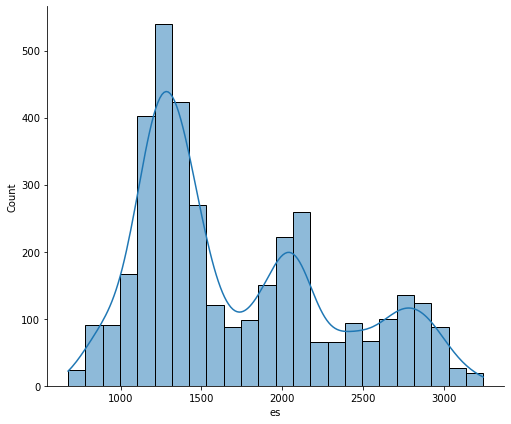

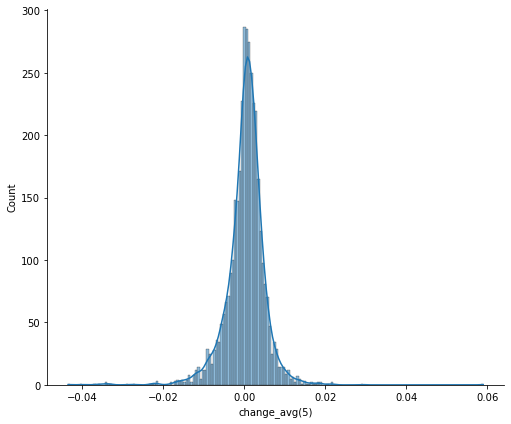

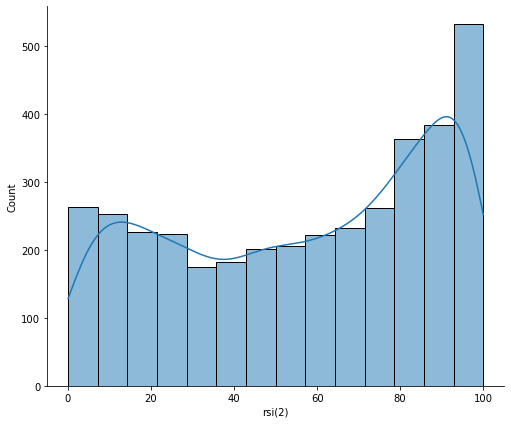

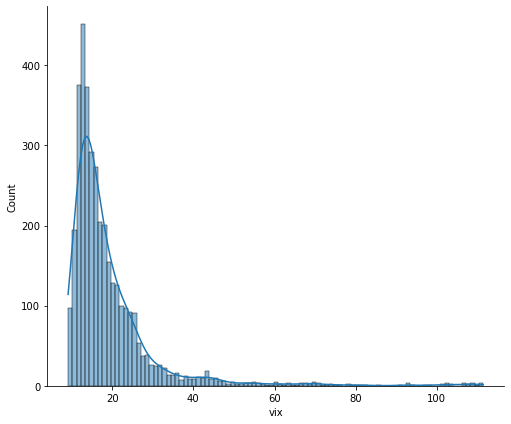

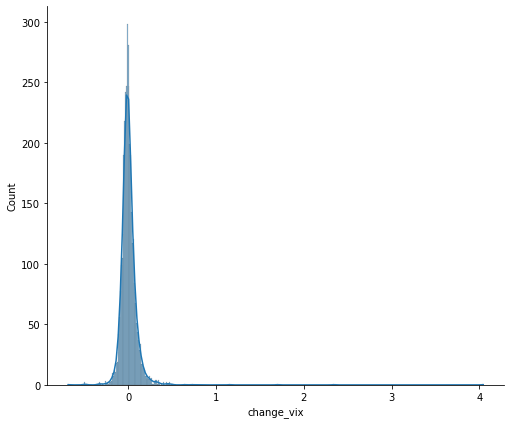

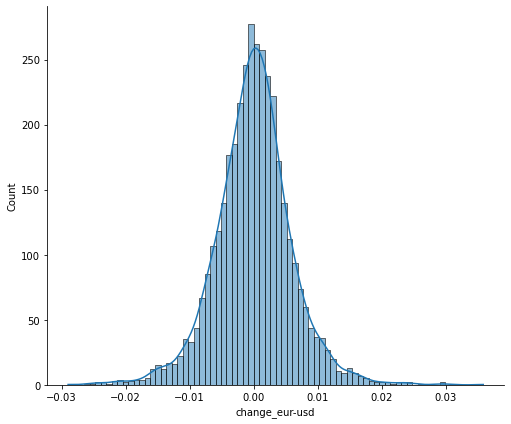

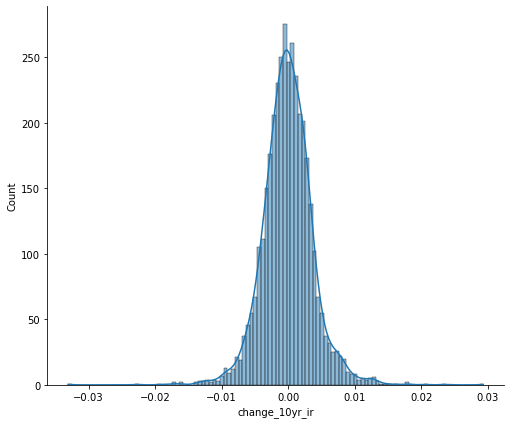

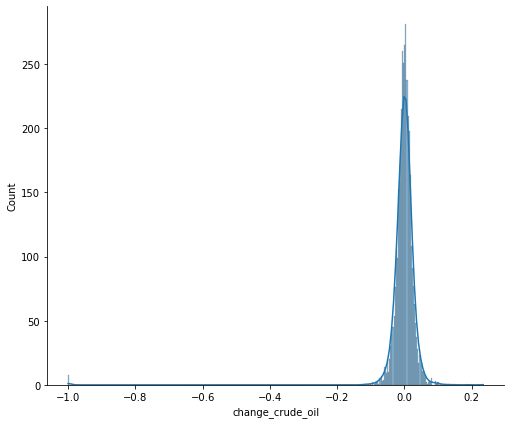

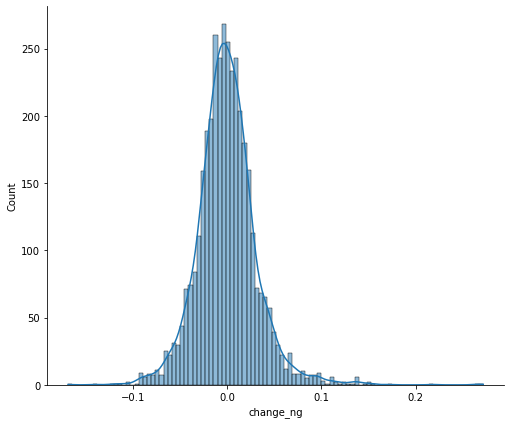

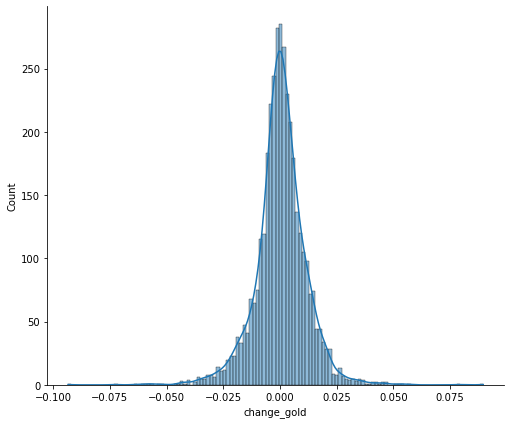

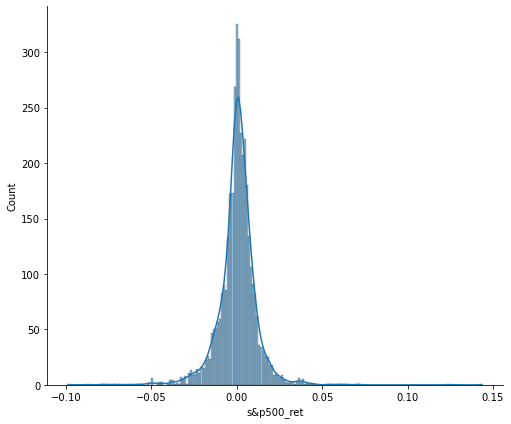

In [32]:
# Display all the plot for the continuous features.
for col in df_continuous:
    sns.displot(data=df_continuous, x= df_continuous[col], kde = True, height=6, aspect=1.2)
    plt.show()

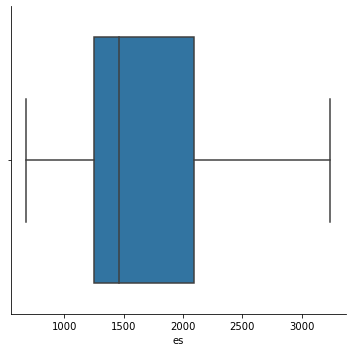

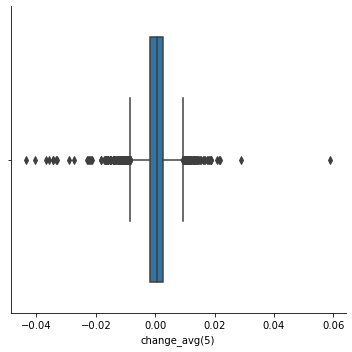

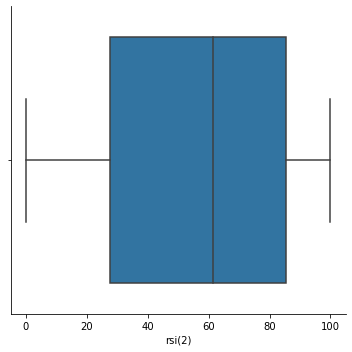

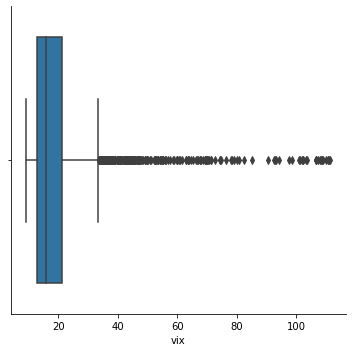

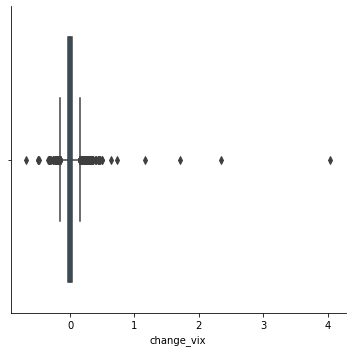

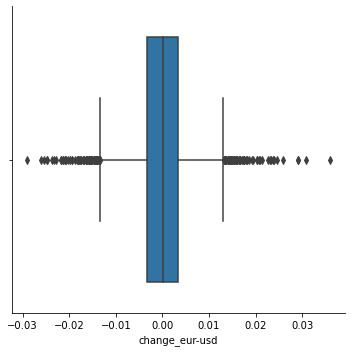

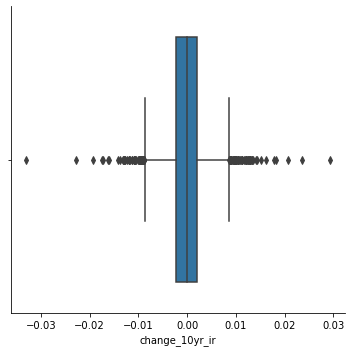

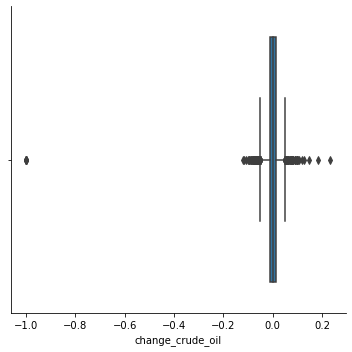

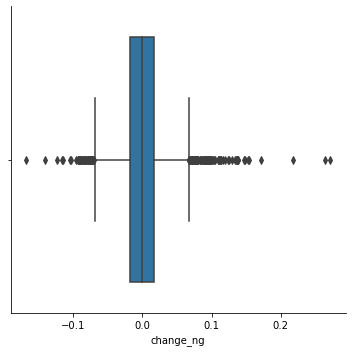

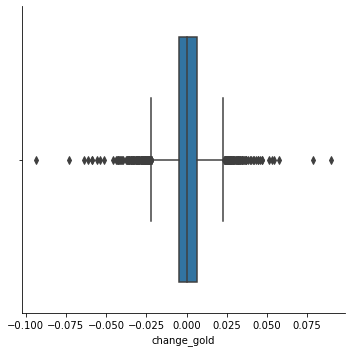

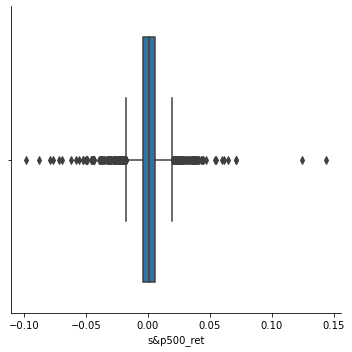

In [33]:
# Looking for the outliers.
for col in df_continuous:
    sns.catplot(data=df_continuous, x= col, kind="box")
    plt.show()

#### 3.1.2 Bivariate analysis

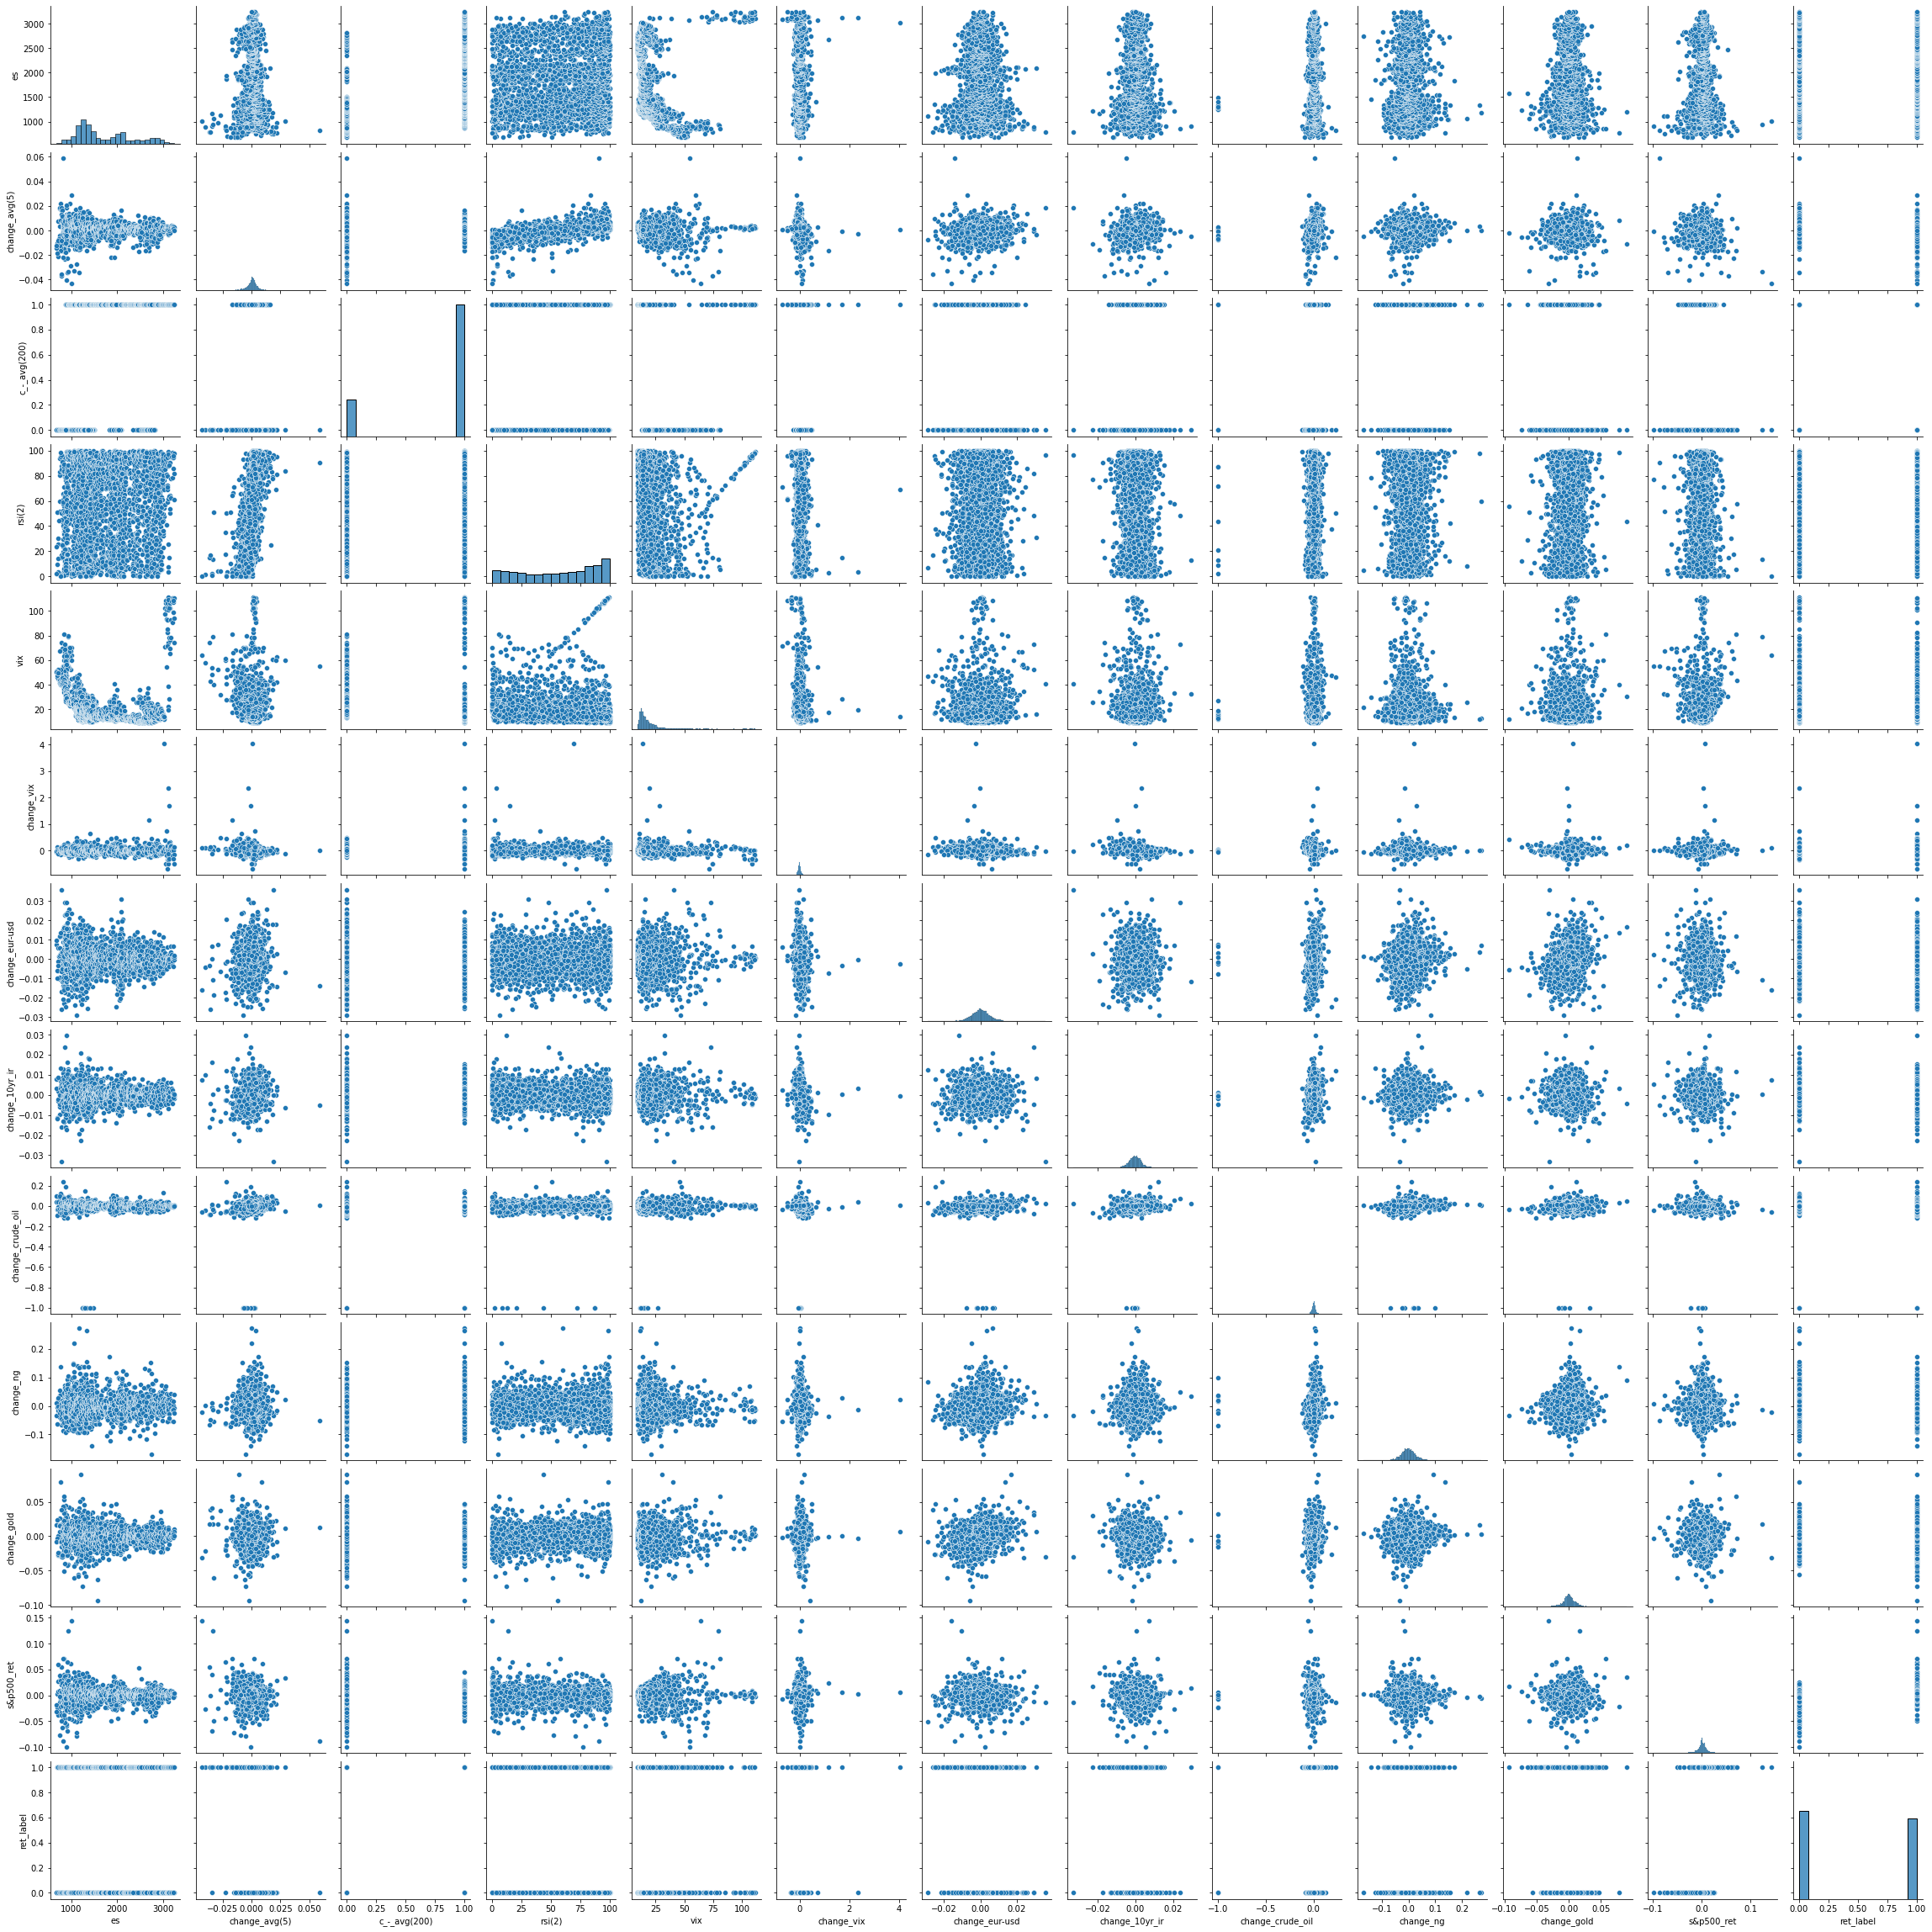

In [34]:
sns.pairplot(new_df)

#### 3.1.3 Multicolinearity between the features 

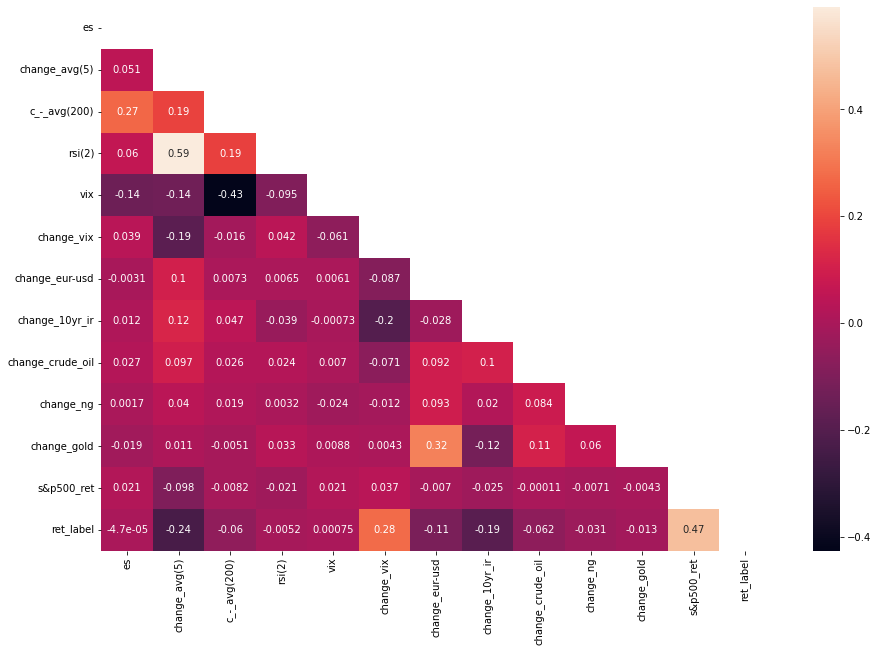

In [35]:
correlations = new_df.corr()      
mask = np.zeros_like(correlations)                
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))          
ax = sns.heatmap(correlations, mask = mask, annot = True)
plt.show()

- We can see there is a correlation between the variable rsi(2) and change_avg(5)

#### 3.1.3 Looking the dicrete variables

<AxesSubplot:xlabel='ret_label', ylabel='count'>

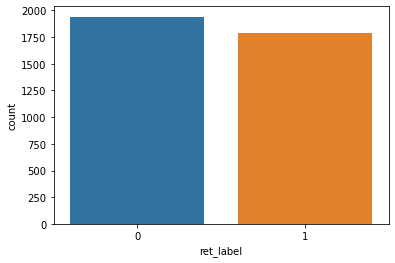

In [36]:
sns.countplot(x="ret_label", data=new_df)

In [37]:
round(new_df.ret_label.value_counts(normalize=True)*100,2)

0    52.05
1    47.95
Name: ret_label, dtype: float64

<AxesSubplot:xlabel='c_-_avg(200)', ylabel='count'>

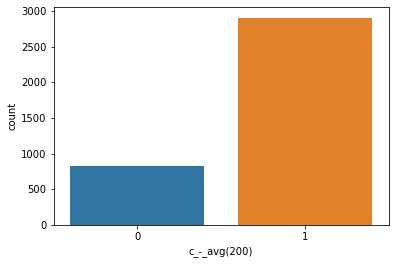

In [38]:
sns.countplot(x="c_-_avg(200)", data=new_df)